In [29]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.special import gamma
from sympy import diff, symbols, integrate, Rational, solve, Pow, limit
from scipy.integrate import quad
from numpy.random import normal
from scipy.stats import chi2, t

In [30]:
n, a, sigma = 120, -4, 4

In [31]:
X = normal(a, sigma, n)
#print(np.mean(X**2) - np.mean(X)*np.mean(X))
print(X)

[ -3.82622892  -0.68079795  -1.35492705   1.33564406  -2.61599876
  -4.0196482   -2.48648098  -5.54954236  -7.23414921  -9.55749418
   0.55122505  -4.11945903  -4.3771298   -3.32390603  -1.97675824
   0.84353473 -10.29911801  -7.29121997  -3.58646341  -2.19546193
   4.65786183   5.13305847  -5.41549946  -8.93181551   0.75734552
   0.90639986  -2.99397012  -0.18162274   5.64424671  -4.72086407
  -1.06998417   0.3194889   -4.01681144  -2.54429496  -4.6624033
  -1.9210919   -6.80201263 -11.19077124  -4.68902831 -10.8916561
  -3.5432375   -5.47731928  -2.91509179  -8.27573674  -0.22679511
  -1.24452983  -4.29980968  -4.33625058 -10.16400641   0.87486909
  -4.24541912  -6.35287059 -10.77857505  -6.04402517  -7.13939973
  -5.09177027   4.86528273  -0.23377943   1.67392385  -8.17307436
  -5.6683865   -0.40951289  -7.77943857   1.07374161  -2.98761085
  -1.58513404  -8.40006443   0.99207273   1.38081623  -0.06523772
  -5.66302674  -7.50345193   0.25422873  -4.43784583  -1.34055111
   0.2351097

In [34]:
S2 = 1/(len(X)-1)*np.sum((X-np.mean(X))**2)
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 

quantiles = chi2.ppf(probs, df)
print(quantiles)
sigma1 = (S2*(n-1)/quantiles[1])**0.5
sigma2 = (S2*(n-1)/quantiles[0])**0.5
print("Sigma interval:", round(sigma1, 3), round(sigma2, 3))


[ 94.81123694 145.46074022]
Sigma interval: 3.36 4.162


In [33]:
df = n - 1
alpha = 1 - 0.9
probs = [alpha/2, 1-alpha/2] 
mx = np.mean(X)
quantiles = t.ppf(probs, df)
a1 = mx - (S2/n)**0.5*quantiles[1] 
a2 = mx - (S2/n)**0.5*quantiles[0]
print("ME intervals:", round(a1, 3), round(a2, 3))

ME intervals: -4.272 -3.148


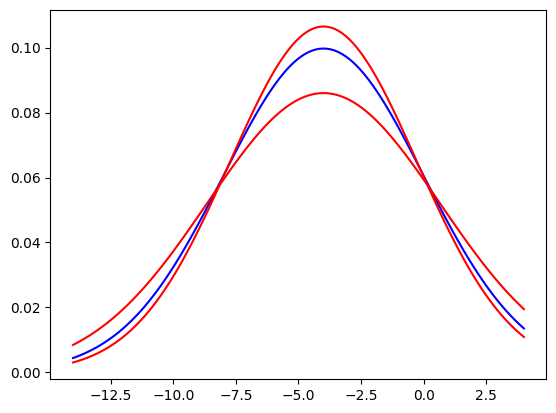

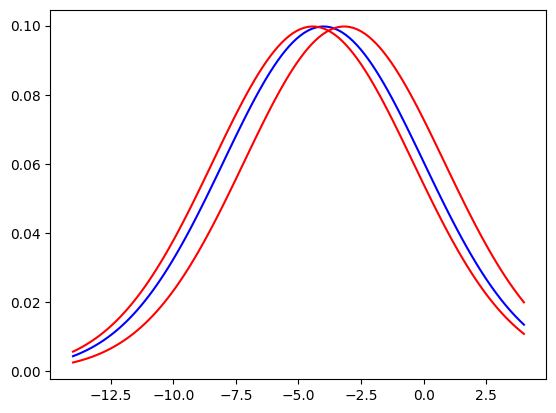

In [27]:
x = np.linspace(-14, 4, 120)
y = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a)**2/(2*sigma**2)) for i in x]
y1 = [1/(2*math.pi)**0.5/sigma1*math.e**(-(i-a)**2/(2*sigma1**2)) for i in x]
y2 = [1/(2*math.pi)**0.5/sigma2*math.e**(-(i-a)**2/(2*sigma2**2)) for i in x]

y11 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a1)**2/(2*sigma**2)) for i in x]
y22 = [1/(2*math.pi)**0.5/sigma*math.e**(-(i-a2)**2/(2*sigma**2)) for i in x]

plt.plot(x, y, color="blue")
plt.plot(x, y1, color="red")
plt.plot(x, y2, color="red")
plt.show()

plt.plot(x, y, color="blue")
plt.plot(x, y11, color="red")
plt.plot(x, y22, color="red")
plt.show()

7


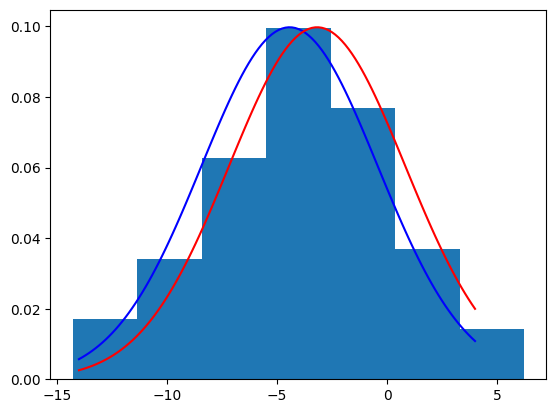

In [28]:
intervals = int(np.log2(n))+1
print(intervals)

plt.hist(X, bins=intervals, density=True)
plt.plot(x, y11, color="blue")
plt.plot(x, y22, color="red")
plt.show()